In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfs = []
files = glob.glob("/scratch/users/schuetzn/data/mhc_dataset/*/metadata.parquet")
for file in files:
    hq = file.split("/")[-2]
    df = pd.read_parquet(file)
    df["healthCode"] = hq
    dfs.append(df)


In [3]:
df = pd.concat(dfs)

In [4]:
stats = df.groupby("healthCode")["date"].apply(lambda x: len(np.unique(x)))

/tmp/ipykernel_247547/2587653809.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[str(t) for t in thresholds], y=counts, palette="viridis")


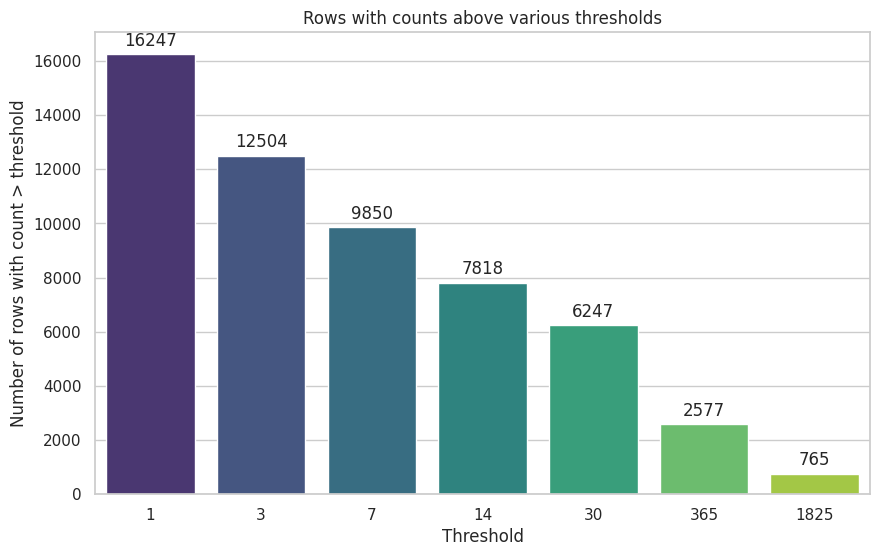

In [5]:
counts_series = stats
thresholds = [1, 3, 7, 14, 30, 365, 5 * 365]
values = [(counts_series > t).sum() for t in thresholds]
counts = [(counts_series > t).sum() for t in thresholds]


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=[str(t) for t in thresholds], y=counts, palette="viridis")
for i, count in enumerate(counts):
    ax.text(i, count + max(counts) * 0.01, str(count), ha='center', va='bottom', fontsize=12)
plt.xlabel("Threshold")
plt.ylabel("Number of rows with count > threshold")
plt.title("Rows with counts above various thresholds")
plt.show()

In [6]:
daily_stats = []
for idx, row in df.groupby(["healthCode", "date"]):
    data_coverage_sum = row.data_coverage.sum()
    data_coverage_mean = row.data_coverage.mean()
    n_above_zero = row[row.data_coverage > 0]
    daily_stats.append({
        "data_coverage_sum": data_coverage_sum,
        "data_coverage_mean": data_coverage_mean,
        "n_above_zero": len(n_above_zero),
        "healthCode": row["healthCode"].iloc[0]
    })

In [7]:
data_coverage_mean

0.7783564814814815

In [9]:
len(daily_stats)

4246004

In [12]:
import pickle
#with open("../summary_daily.pkl", "wb") as f:
#    pickle.dump(daily_stats, f)

In [25]:
coverage_df = pd.DataFrame(daily_stats)

## Days with ANY data

In [26]:
len(coverage_df[coverage_df.data_coverage_sum > 0])

3517345

/tmp/ipykernel_247547/4160261543.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[str(t) for t in thresholds], y=counts, palette="viridis")


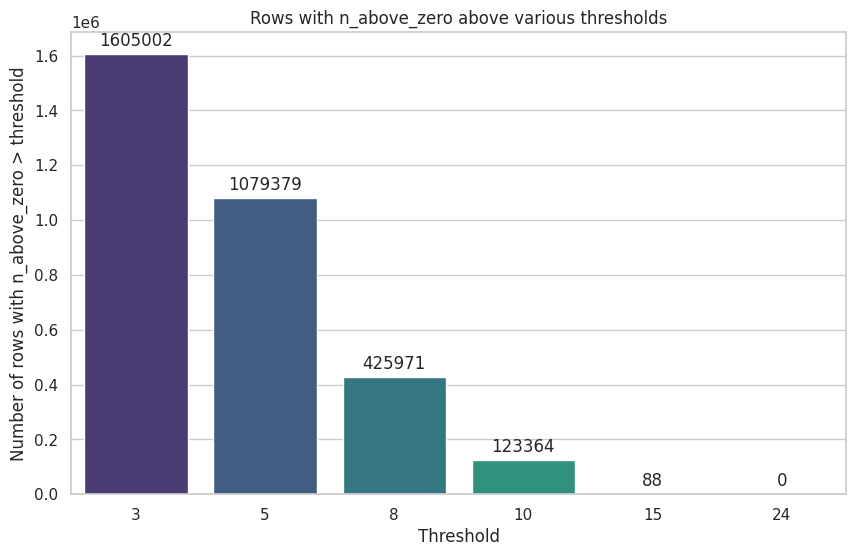

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

thresholds = [3, 5, 8, 10, 15, 24]
counts = [len(coverage_df[coverage_df.n_above_zero > t]) for t in thresholds]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=[str(t) for t in thresholds], y=counts, palette="viridis")
for i, count in enumerate(counts):
    ax.text(i, count + max(counts)*0.01, str(count), ha='center', va='bottom', fontsize=12)
plt.xlabel("Threshold")
plt.ylabel("Number of rows with more than k number of modalities")
plt.title("Rows with n_above_zero above various thresholds")
plt.show()

/tmp/ipykernel_247547/4063090530.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[str(t) for t in thresholds], y=unique_counts, palette="viridis")


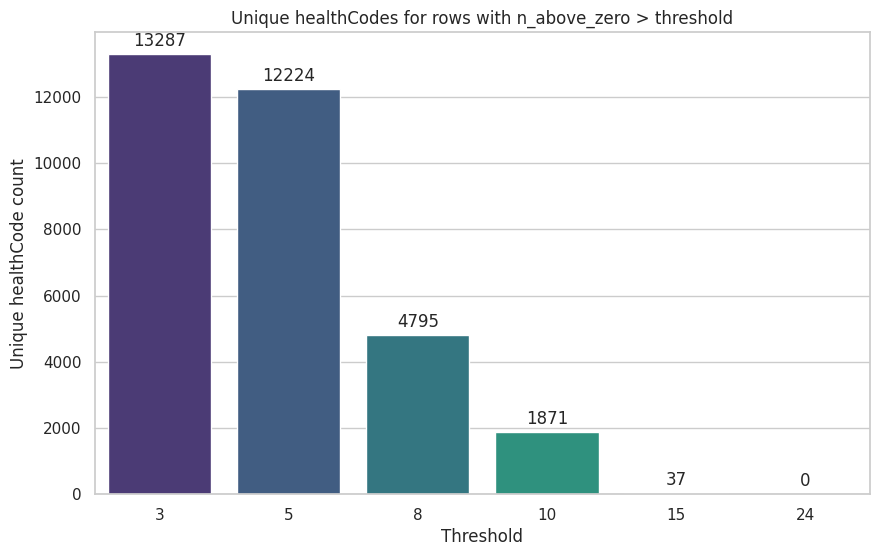

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

thresholds = [3, 5, 8, 10, 15, 24]
unique_counts = [coverage_df[coverage_df.n_above_zero > t]['healthCode'].nunique() for t in thresholds]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=[str(t) for t in thresholds], y=unique_counts, palette="viridis")
for i, count in enumerate(unique_counts):
    ax.text(i, count + max(unique_counts)*0.01, str(count), ha='center', va='bottom', fontsize=12)
plt.xlabel("Threshold")
plt.ylabel("Unique healthCode count")
plt.title("Unique healthCodes for rows with n_above_zero > threshold")
plt.show()